In [104]:
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import LabelEncoder;
import numpy as np;
from sklearn.metrics import r2_score,mean_squared_error;
from sklearn.linear_model import LinearRegression;

Since its a regression problem im applying linear regression to this problem and if need be i may use neural networks!

In [105]:
#Load the train And test data using the pandas dataframe Library
train=pd.read_csv("Train.csv",index_col=False)
test=pd.read_csv("Test.csv",index_col=False)

In [106]:
#now we check the no of rows and columns present in train and test Dataset
train.shape,test.shape

((8523, 12), (5681, 11))

We always have one variable less than the train dataset cuz we train the model using the train data to predict the target variable of the test data.
This is supervised learning

In [107]:
#print the columns of the test data
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [108]:
#print the columns of the train data
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [109]:
#now we combine the train and test data to perform ExploratoryDataAnalysis(EDA)
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)

In [110]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [111]:
data["source"].unique()

array(['train', 'test'], dtype=object)

In [112]:
print(data.shape)

(14204, 13)


Now we have 13 columns since we have added one more column called source 

In [113]:
#describe function from the numerical summary
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Describe only provides insights on the numerical data and not on categorical text data or any text data in general
WE can also note that there are some items missing in the count section of certain columns and the max value that are present in the columns overall this function is really helpful!

In [114]:
#now we check for missing values!
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

3 columns have missing data in them so now we patch them up using some techniques. We can also predict these values by using a model.Lets do that!

In [115]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [116]:
#print the unique values in the outlet_establisment_year
data["Outlet_Establishment_Year"].unique()#data ranges from 1985 to 2009 
# we can calculate the outlet age

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [117]:
data["Outlet_Age"]=2022-data["Outlet_Establishment_Year"]
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13


In [118]:
data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

We Have missing values in here we need to fix it! But lets explore further 

In [119]:
data["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

We can see that low fat products are the most abandoned

In [120]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Here most of the outlet size are medium sized

In [121]:
#here we use the mode function to find the most  common value in outlet_size
data["Outlet_Size"].mode()[0] #adding 0 removes index col

'Medium'

So now we replace the missing values of column outlet size with the value medium since its the most occuring value in that particular column

In [122]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [123]:
data["Outlet_Size"].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

It makes sense for u to replace the categories like ones given in text to be replaced by the most commonly occuring value/category but that does not hold good for numerical data so u gotta use methods such as mean median.

In [124]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [125]:
data["Item_Weight"].isnull().sum()

0

array([2024., 2366., 2250., 1668., 1514., 1097.,  880.,  770.,  527.,
        412.,  320.,  127.,   50.,   55.,   40.,   25.,   20.,   30.,
         23.,    6.])

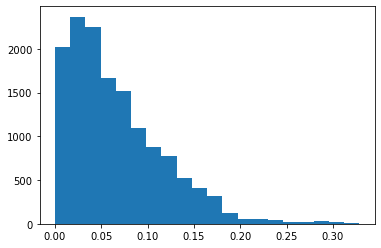

In [126]:
#Now we plot a histogram for the item visibility to deal with any outliers! we do this by looking at the distribution of the histograms in general.
plt.hist(data["Item_Visibility"],bins=20)[0]

Detecting Outliers!
An Outlier is a data point that is said to be points that lie outside the overall distribution. A common rule states that a data point is an 
outlier if it is more than 1.5*IQR(InterQuartileRange) above the third quartile or below the first quartile, knowing this one can remove outliers and fill resultin data 
in fill_data_variable


In [127]:
#calculating the first quartile for item_visibility!
Q1=data["Item_Visibility"].quantile(0.25)#0.25 is a quartile indicating the first quantile
Q3=data["Item_Visibility"].quantile(0.75)#note that IQR is the difference between first and second quantile this is basic formula remember this!


In [128]:
#calculating IQR
IQR=Q3-Q1

In [129]:
IQR

0.06700157100000001

Now that we know the interquartile range we remove the outliers

In [130]:
fill_data=data.query("(@Q1-1.5*@IQR) <=Item_Visibility <=(@Q3+1.5*@IQR)")

Note that in the query we represent the operations with common brackets and variables with an @ symbol

In [131]:
#display the data
fill_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,35


In [132]:
fill_data.shape,data.shape #this is because we removed the outliers sucessfully

((13943, 14), (14204, 14))

We can see that after some cleaning work fill data values are less than the original data values.

In [133]:
#assigning the fill data to the Data Dataframe.
data=fill_data

In [134]:
data["Item_Visibility"].max()

0.193772568

In [135]:
data["Item_Visibility"].min()

0.0

In [136]:
data["Item_Visibility"].mean()

0.06262947917664799

Here we need to first start with min value upto max value with mediocre values in between to actually make sense of the data. Also the labels must be lower than the bin edges(those numerical values in the list!)

In [137]:
#now we modify the item_visibility column and specify it as categories of high,low,and visibility!
data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels=["Low Viz","Viz","High Viz"])

If you want equal distribution of your items use Qcut

In [138]:
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [139]:
#now we replace those null values with low visibility!
data["Item_Visibility_bins"]=data["Item_Visibility_bins"].replace(np.nan,"Low Viz",regex=True) # here regex true searches for the pattern and does pattern matching!

In [140]:
data["Item_Visibility_bins"].value_counts()

Low Viz     7363
Viz         4283
High Viz    1418
Name: Item_Visibility_bins, dtype: int64

In [141]:
# the item fat content..it had so many typos for low fat and regular we fix that first!
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace("reg","Regular")


In [142]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [143]:
#now we encode the categorical variables into numeric values using the label encoder.
le=LabelEncoder()
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])
data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])

In [144]:
#transforming outlet size
data["Outlet_Size"]=le.fit_transform(data["Outlet_Size"])

In [145]:
#transfroming the outlet location type
data["Outlet_Location_Type"]=le.fit_transform(data["Outlet_Location_Type"])

In [146]:
data["Outlet_Location_Type"].unique(),data["Outlet_Size"].unique()

(array([0, 2, 1]), array([1, 0, 2]))

Note these are mapped to digits from 0 to 2 and could be more depending on the no of categories.
Also if u are trying to load them into a neural network its highly recommended u use one hot encoding as neural networks love values belonging to range 0 to 1.

In [147]:
data["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [148]:
dummy=pd.get_dummies(data["Outlet_Type"])#dummies is the pandas way of one hot encoding!
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [149]:
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

As there are multiple values of food,non consumable items,etc with different numbers,combine the item types.

In [150]:
#since multiple categories are present in the item identifier we can reduce this by mapping them.
data["Item_Type_Combined"]=data["Item_Identifier"].apply(lambda x:x[0:2])
data["Item_Type_Combined"]=data["Item_Type_Combined"].map({"FD":"Food",
                                                           "NC":"Non Consumable",
                                                           "DR":"Drinks"})

To understand such abbrevations of a problem u need to read the problem statements given in the description then only u will get it!

In [151]:
data["Item_Type_Combined"].value_counts()
#now you can see only three columns are present!

Food              9991
Non Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [152]:
data.shape

(13943, 16)

In [153]:
#now we perform one hot encoding for all the columns since model works on numeric values and not categorical values
data=pd.get_dummies(data,columns=["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Type_Combined"])

In [154]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [155]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Age,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,23,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,13,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,23,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,24,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,35,...,1,0,0,0,1,0,0,0,0,1


In [182]:
#now we drop the columns that have been converted to different types!
import warnings;
warnings.filterwarnings("ignore")#this is used to supress any warnings from python!
#here im dropping columns that hve been modified into better version of themselves
data.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)


In [183]:
#dividing the dataset into train and test sets
train=data.loc[data["source"]=="train"]#note we use loc instead of iloc cuz we are specifying the label name and not integer positions for which we use iloc
test=data.loc[data["source"]=="test"]

In [184]:
train.shape,test.shape

((8375, 24), (5568, 24))

In [185]:
#dropping the unecessary columns!
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)
train.drop(["source"],axis=1,inplace=True)#note now im using inplace cuz im not assiging the result to anything! if u are then dont use it!

In [186]:
train.shape,test.shape

((8375, 23), (5568, 22))

In [187]:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [188]:
train2=pd.read_csv("train_modified.csv",index_col=False)
test2=pd.read_csv("test_modified.csv",index_col=False)

In [189]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_

In [190]:
#now we drop the irelevant variables!
X_train=train2.drop(["Item_Outlet_Sales","Outlet_Identifier","Item_Identifier"],axis=1)
Y_train=train2.Item_Outlet_Sales

In [191]:
X_test=test2.drop(["Item_Identifier","Outlet_Identifier",],axis=1)

In [192]:
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non Consumable
0,20.750000,0.007565,107.8622,23,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,15,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,24,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,15,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,37,2,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


In [193]:
Y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [194]:
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,test_size=0.25,random_state=42)

In [195]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [196]:
reg.score(x_test,y_test)

0.5664398906197005

In [197]:
reg.score(x_train,y_train)

0.5553104851211987

In [198]:
print(reg.coef_)

[-9.11484571e-01 -3.40968286e+02  1.57820867e+01 -3.49496980e+01
 -1.28084802e+00 -5.27436317e+00  5.27436317e+00  2.07702821e+02
  4.52858671e+01 -2.52988688e+02  5.80518129e+02 -3.37638165e+02
 -2.42879964e+02 -1.64779970e+03 -1.72176414e+02 -3.78109649e+02
  2.19808576e+03  6.19671356e+00  2.81371707e+01 -3.43338843e+01]


In [216]:
print(reg.intercept_)

1185.6980025607745


In [207]:
predictions=reg.predict(X_test)

In [200]:
import math;
print(math.sqrt(mean_squared_error(y_test,predictions)))

1114.8387544268032


In [210]:
y_sales_pred=reg.predict(X_test)
y_sales_pred

array([1782.123065  , 1586.47521738, 1834.42862091, ..., 1819.84773411,
       3599.72694579, 1268.00720308])

In [211]:
test_predictions=pd.DataFrame({
    "Item_Identifier":test2.Item_Identifier,
    "Outlet_Identifier":test2.Outlet_Identifier,
    "Item_Outlet_Sales":y_sales_pred
},columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])

In [214]:
test_predictions.to_csv("predictions.csv")

In [215]:
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1782.123065
1,FDW14,OUT017,1586.475217
2,NCN55,OUT010,1834.428621
3,FDQ58,OUT017,2653.351342
4,FDY38,OUT027,5175.406991
...,...,...,...
5563,FDB58,OUT046,2352.812117
5564,FDD47,OUT018,2409.802211
5565,NCO17,OUT045,1819.847734
5566,FDJ26,OUT017,3599.726946
